In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# Reshape and Normalization
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/255.0

# One -Hot encode labels
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)


In [3]:
print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


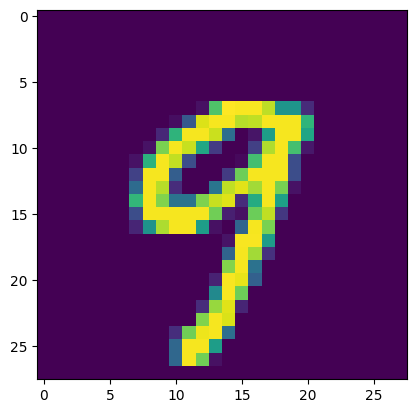

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
import matplotlib.pyplot as plt
index = 45
plt.imshow(x_train[index])
plt.show()
print(y_train[index])

In [8]:
#ANN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

def build_ann_model():
    model=Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    return model

ann_model=build_ann_model()
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
ann_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2439 - accuracy: 0.9283 - val_loss: 0.1140 - val_accuracy: 0.9632
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1019 - accuracy: 0.9685 - val_loss: 0.0861 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0712 - accuracy: 0.9772 - val_loss: 0.0855 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9829 - val_loss: 0.0919 - val_accuracy: 0.9714
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0761 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0746 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 0.0907 - val_accuracy:

In [ ]:
ann_loss, ann_acc = ann_model.evaluate(x_test,y_test)
print('ANN Test Accuracy', ann_acc)